In [ ]:
#Contains rough draft pieces of code. Should not be considered the working version. 

In [1]:
# preliminaries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

exome = pd.read_excel("JSexomes_2_output_1percentExAC_Corrected.xlsx")
exome.head

<bound method NDFrame.head of                                      File Name Chromosome   Position  \
0                      8073-1.final_output.txt          1     801943   
1                      8079-3.final_output.txt          1     801943   
2                      8168-3.final_output.txt          1     801943   
3                      8179-3.final_output.txt          1     801943   
4                      8212-3.final_output.txt          1     801943   
5                      8212-4.final_output.txt          1     801943   
6                      8276-3.final_output.txt          1     801943   
7                      8358-3.final_output.txt          1     801943   
8                      8385-3.final_output.txt          1     801943   
9                      8440-3.final_output.txt          1     801943   
10                     8441-3.final_output.txt          1     801943   
11                     8073-1.final_output.txt          1     801995   
12                   8084Trio.fina

In [23]:
exomeFiltered = exome.loc[:, ['CADD_score', 'AB', 'Dist2Splice', 'ExAC_Highest_MAF','localization', 'js_cause']].replace(['EXNF','CADDNF','unknown','NaN'],0).fillna(0)

In [24]:
exomeTest = exomeFiltered.loc[:,['CADD_score', 'AB', 'Dist2Splice', 'ExAC_Highest_MAF']]

array([ 0.99995194,  1.        ,  1.        ,  1.        ])

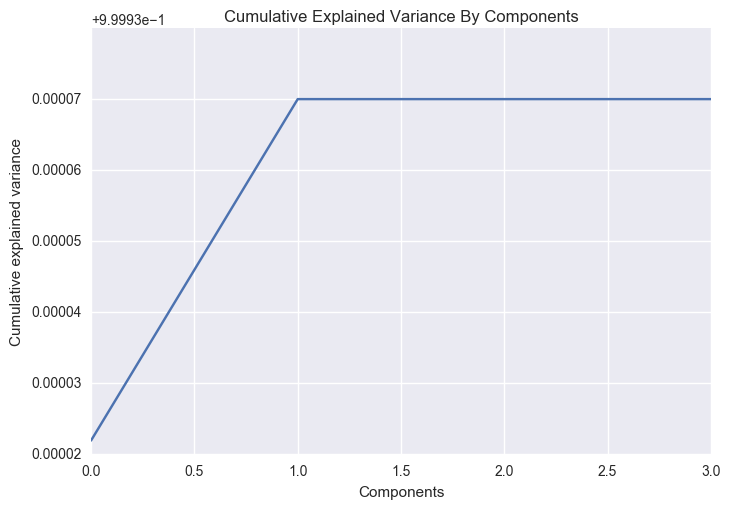

In [25]:
#PCA portion of the analysis
eigenVariant = PCA()
eigenVariant.fit(exomeTest)

plt.plot(np.cumsum(eigenVariant.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance By Components')
np.cumsum(eigenVariant.explained_variance_ratio_)

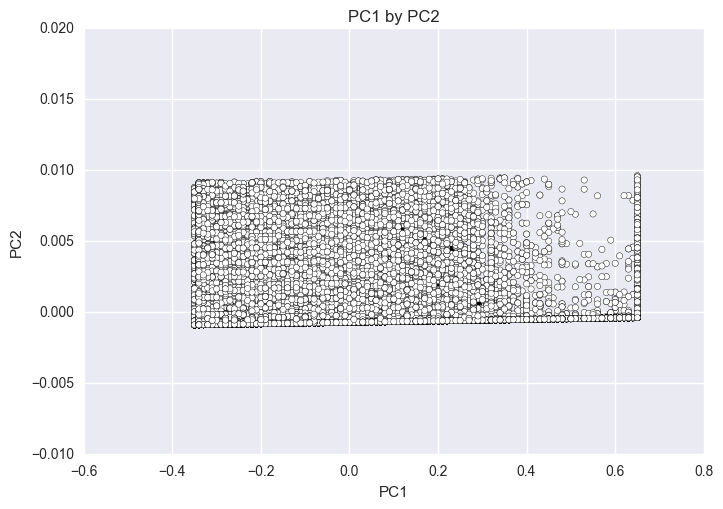

In [26]:
variants_red = eigenVariant.transform(exomeTest)
plt.scatter(variants_red[:, 0].flatten(),variants_red[:, 1].flatten(), c=exome['js_cause'])
plt.title("PC1 by PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")

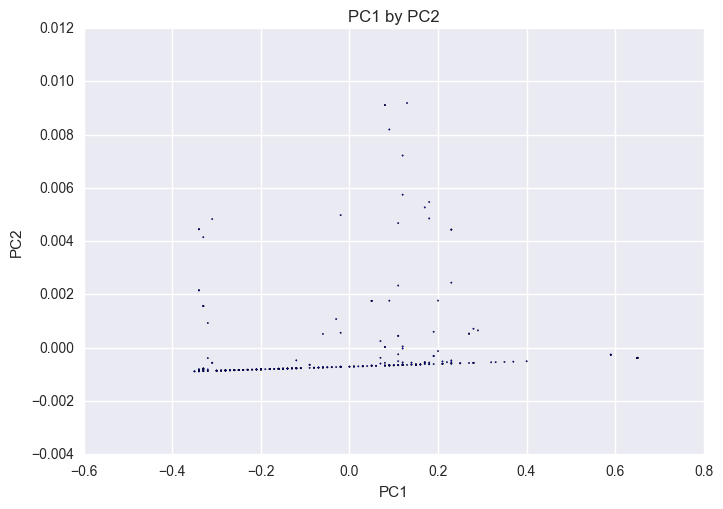

In [27]:
#PC plot with only known JS causing variant
variants_red = eigenVariant.transform(exomeTest)
plt.scatter(variants_red[:, 0].flatten(),variants_red[:, 1].flatten(), exome['js_cause']==1)
plt.title("PC1 by PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")

[0 0 0 ..., 0 0 0]


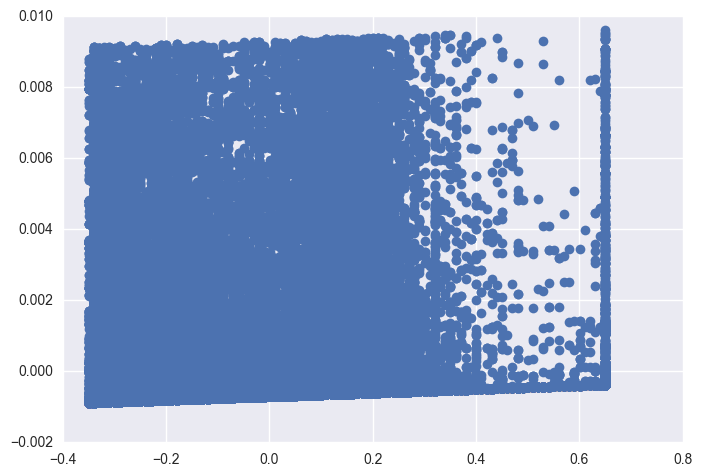

In [28]:
#Classification portion of the analysis
model = LinearDiscriminantAnalysis()

X = variants_red[:,[0,1]]
y = exome['js_cause']

model.fit(X, y)

predicted = model.predict(X)

print(predicted)

for JS in set(predicted):
    plt.plot(X[predicted==JS,0], X[predicted==JS,1], 'o')

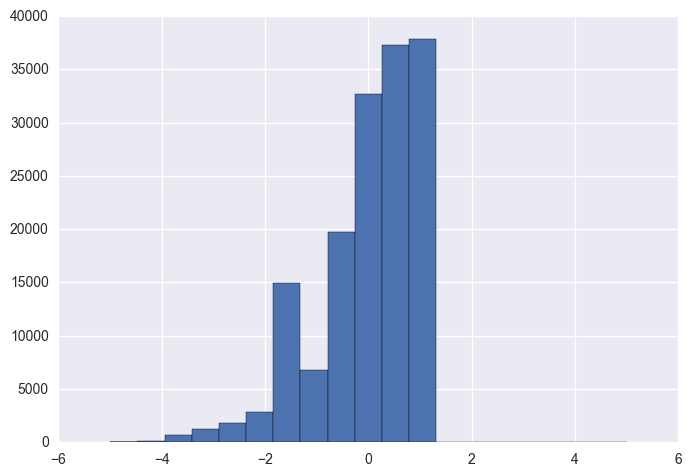

In [29]:
X_new = model.transform(X)

for JS in set(predicted):
    plt.hist(X_new[predicted==JS], bins=np.linspace(-5,5,20))

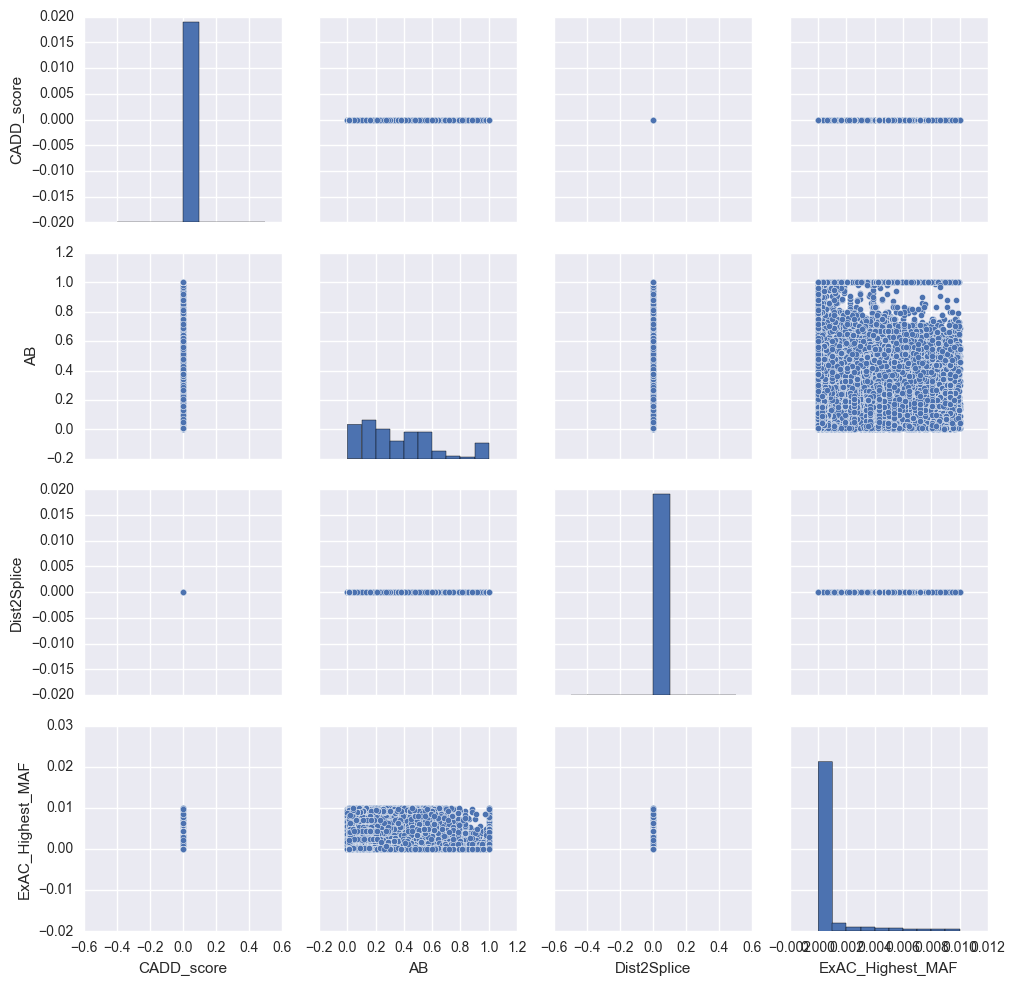

In [33]:
sns.pairplot(exomeTest)

In [ ]:
sns.pairplot()